In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# input file path
datasetdir = "D://indivdual_models//Dataset//2022_EC11K_single_drug"
resultdir = "D://indivdual_models//Result//Model_generation//2022_EC11K_single_drug"

C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorf

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15182761352113734970
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8267490918
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17491763495528144977
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

In [3]:
# hyperparameters of CNN
num_classes = 1
learning_rate = 0.0002
training_epochs = 40
batch_size = 50
# img_rows, img_cols = 154, 154


Starttime: 20221007
AEW541_//n
train_X shape: (392, 18988, 1)
392 train samples
98 test samples
StartTime : 2022-10-07 15:09:29.798499
StartTime : 2022-10-07 15:09:30.068947
Train on 392 samples, validate on 98 samples
Epoch 1/40
392/392 [==============================] - 1s 2ms/step - loss: 2.8471 - mse: 2.8471 - mae: 1.5857 - val_loss: 2.4405 - val_mse: 2.4405 - val_mae: 1.4772
Epoch 2/40
392/392 [==============================] - 0s 329us/step - loss: 1.9043 - mse: 1.9043 - mae: 1.2727 - val_loss: 1.0634 - val_mse: 1.0634 - val_mae: 0.9118
Epoch 3/40
392/392 [==============================] - 0s 310us/step - loss: 0.9258 - mse: 0.9258 - mae: 0.8084 - val_loss: 0.6646 - val_mse: 0.6646 - val_mae: 0.5268
Epoch 4/40
392/392 [==============================] - 0s 293us/step - loss: 0.9676 - mse: 0.9676 - mae: 0.7082 - val_loss: 0.6770 - val_mse: 0.6770 - val_mae: 0.5089
Epoch 5/40
392/392 [==============================] - 0s 277us/step - loss: 0.9069 - mse: 0.9069 - mae: 0.7176 - val_lo

Epoch 7/40
326/326 [==============================] - 0s 328us/step - loss: 1.7295 - mse: 1.7295 - mae: 0.7604 - val_loss: 0.3407 - val_mse: 0.3407 - val_mae: 0.4243
Epoch 8/40
326/326 [==============================] - 0s 319us/step - loss: 1.4562 - mse: 1.4562 - mae: 0.7304 - val_loss: 0.4721 - val_mse: 0.4721 - val_mae: 0.6041
Epoch 9/40
326/326 [==============================] - 0s 393us/step - loss: 1.4171 - mse: 1.4171 - mae: 0.7573 - val_loss: 0.3932 - val_mse: 0.3932 - val_mae: 0.5125
Epoch 10/40
326/326 [==============================] - 0s 411us/step - loss: 1.4502 - mse: 1.4502 - mae: 0.6949 - val_loss: 0.3418 - val_mse: 0.3418 - val_mae: 0.4304
Epoch 11/40
326/326 [==============================] - 0s 367us/step - loss: 1.4413 - mse: 1.4413 - mae: 0.7028 - val_loss: 0.3440 - val_mse: 0.3440 - val_mae: 0.4350
Epoch 12/40
326/326 [==============================] - 0s 321us/step - loss: 1.2555 - mse: 1.2555 - mae: 0.6668 - val_loss: 0.3520 - val_mse: 0.3520 - val_mae: 0.4438
E

392/392 [==============================] - 0s 305us/step - loss: 2.4406 - mse: 2.4406 - mae: 1.2031 - val_loss: 1.8992 - val_mse: 1.8992 - val_mae: 1.1458
Epoch 15/40
392/392 [==============================] - 0s 296us/step - loss: 2.4207 - mse: 2.4207 - mae: 1.1973 - val_loss: 1.8824 - val_mse: 1.8824 - val_mae: 1.1310
Epoch 16/40
392/392 [==============================] - 0s 312us/step - loss: 2.3108 - mse: 2.3108 - mae: 1.1752 - val_loss: 1.9081 - val_mse: 1.9081 - val_mae: 1.1412
Epoch 17/40
392/392 [==============================] - 0s 308us/step - loss: 2.1372 - mse: 2.1372 - mae: 1.1144 - val_loss: 1.8631 - val_mse: 1.8631 - val_mae: 1.1219
Epoch 18/40
392/392 [==============================] - 0s 303us/step - loss: 1.9709 - mse: 1.9709 - mae: 1.1003 - val_loss: 1.8358 - val_mse: 1.8358 - val_mae: 1.1112
Epoch 19/40
392/392 [==============================] - 0s 304us/step - loss: 1.7599 - mse: 1.7599 - mae: 1.0186 - val_loss: 1.8359 - val_mse: 1.8359 - val_mae: 1.1117
Epoch 20/4

392/392 [==============================] - 0s 316us/step - loss: 0.2873 - mse: 0.2873 - mae: 0.3897 - val_loss: 0.7208 - val_mse: 0.7208 - val_mae: 0.2568
Epoch 22/40
392/392 [==============================] - 0s 325us/step - loss: 0.3042 - mse: 0.3042 - mae: 0.3921 - val_loss: 0.7383 - val_mse: 0.7383 - val_mae: 0.2236
Epoch 23/40
392/392 [==============================] - 0s 315us/step - loss: 0.2385 - mse: 0.2385 - mae: 0.3541 - val_loss: 0.7492 - val_mse: 0.7492 - val_mae: 0.2333
Epoch 24/40
392/392 [==============================] - 0s 319us/step - loss: 0.2380 - mse: 0.2380 - mae: 0.3594 - val_loss: 0.7261 - val_mse: 0.7261 - val_mae: 0.2459
Epoch 25/40
392/392 [==============================] - 0s 300us/step - loss: 0.2453 - mse: 0.2453 - mae: 0.3725 - val_loss: 0.7180 - val_mse: 0.7180 - val_mae: 0.2644
Epoch 26/40
392/392 [==============================] - 0s 288us/step - loss: 0.2436 - mse: 0.2436 - mae: 0.3536 - val_loss: 0.7464 - val_mse: 0.7464 - val_mae: 0.2397
Epoch 27/4

393/393 [==============================] - 0s 289us/step - loss: 0.2187 - mse: 0.2187 - mae: 0.3506 - val_loss: 0.6116 - val_mse: 0.6116 - val_mae: 0.4778
Epoch 29/40
393/393 [==============================] - 0s 288us/step - loss: 0.2210 - mse: 0.2210 - mae: 0.3389 - val_loss: 0.5817 - val_mse: 0.5817 - val_mae: 0.5078
Epoch 30/40
393/393 [==============================] - 0s 293us/step - loss: 0.2184 - mse: 0.2184 - mae: 0.3510 - val_loss: 0.6485 - val_mse: 0.6485 - val_mae: 0.4688
Epoch 31/40
393/393 [==============================] - 0s 333us/step - loss: 0.2029 - mse: 0.2029 - mae: 0.3294 - val_loss: 0.6002 - val_mse: 0.6002 - val_mae: 0.4824
Epoch 32/40
393/393 [==============================] - 0s 291us/step - loss: 0.1922 - mse: 0.1922 - mae: 0.3334 - val_loss: 0.6111 - val_mse: 0.6111 - val_mae: 0.4797
Epoch 33/40
393/393 [==============================] - 0s 302us/step - loss: 0.1918 - mse: 0.1918 - mae: 0.3248 - val_loss: 0.6067 - val_mse: 0.6067 - val_mae: 0.4850
Epoch 34/4

Epoch 35/40
393/393 [==============================] - 0s 301us/step - loss: 0.2224 - mse: 0.2224 - mae: 0.3739 - val_loss: 0.6347 - val_mse: 0.6347 - val_mae: 0.2654
Epoch 36/40
393/393 [==============================] - 0s 302us/step - loss: 0.1929 - mse: 0.1929 - mae: 0.3457 - val_loss: 0.6323 - val_mse: 0.6323 - val_mae: 0.1970
Epoch 37/40
393/393 [==============================] - 0s 294us/step - loss: 0.1786 - mse: 0.1786 - mae: 0.3314 - val_loss: 0.6321 - val_mse: 0.6321 - val_mae: 0.2132
Epoch 38/40
393/393 [==============================] - 0s 306us/step - loss: 0.1805 - mse: 0.1805 - mae: 0.3240 - val_loss: 0.6352 - val_mse: 0.6352 - val_mae: 0.2675
Epoch 39/40
393/393 [==============================] - 0s 292us/step - loss: 0.1949 - mse: 0.1949 - mae: 0.3350 - val_loss: 0.6316 - val_mse: 0.6316 - val_mae: 0.2226
Epoch 40/40
393/393 [==============================] - 0s 286us/step - loss: 0.1698 - mse: 0.1698 - mae: 0.3175 - val_loss: 0.6354 - val_mse: 0.6354 - val_mae: 0.274

StartTime : 2022-10-07 15:10:32.337501
Train on 393 samples, validate on 98 samples
Epoch 1/40
393/393 [==============================] - 1s 2ms/step - loss: 2.1867 - mse: 2.1867 - mae: 1.3753 - val_loss: 0.8851 - val_mse: 0.8851 - val_mae: 0.8752
Epoch 2/40
393/393 [==============================] - 0s 353us/step - loss: 0.9094 - mse: 0.9094 - mae: 0.7035 - val_loss: 0.6643 - val_mse: 0.6643 - val_mae: 0.4360
Epoch 3/40
393/393 [==============================] - 0s 313us/step - loss: 0.9906 - mse: 0.9906 - mae: 0.6342 - val_loss: 0.4694 - val_mse: 0.4694 - val_mae: 0.4116
Epoch 4/40
393/393 [==============================] - 0s 318us/step - loss: 0.8231 - mse: 0.8231 - mae: 0.6371 - val_loss: 0.5277 - val_mse: 0.5277 - val_mae: 0.5988
Epoch 5/40
393/393 [==============================] - 0s 334us/step - loss: 0.8447 - mse: 0.8447 - mae: 0.6483 - val_loss: 0.4690 - val_mse: 0.4690 - val_mae: 0.4889
Epoch 6/40
393/393 [==============================] - 0s 325us/step - loss: 0.7777 - mse

383/383 [==============================] - 0s 319us/step - loss: 0.6713 - mse: 0.6713 - mae: 0.5754 - val_loss: 0.5699 - val_mse: 0.5699 - val_mae: 0.3719
Epoch 8/40
383/383 [==============================] - 0s 317us/step - loss: 0.6403 - mse: 0.6403 - mae: 0.5518 - val_loss: 0.5695 - val_mse: 0.5695 - val_mae: 0.3622
Epoch 9/40
383/383 [==============================] - 0s 301us/step - loss: 0.6450 - mse: 0.6450 - mae: 0.5585 - val_loss: 0.5598 - val_mse: 0.5598 - val_mae: 0.4121
Epoch 10/40
383/383 [==============================] - 0s 305us/step - loss: 0.6072 - mse: 0.6072 - mae: 0.5399 - val_loss: 0.5718 - val_mse: 0.5718 - val_mae: 0.3449
Epoch 11/40
383/383 [==============================] - 0s 307us/step - loss: 0.6195 - mse: 0.6195 - mae: 0.5245 - val_loss: 0.5568 - val_mse: 0.5568 - val_mae: 0.3995
Epoch 12/40
383/383 [==============================] - 0s 298us/step - loss: 0.5805 - mse: 0.5805 - mae: 0.5145 - val_loss: 0.5546 - val_mse: 0.5546 - val_mae: 0.4225
Epoch 13/40


387/387 [==============================] - 0s 302us/step - loss: 0.6405 - mse: 0.6405 - mae: 0.6221 - val_loss: 0.6395 - val_mse: 0.6395 - val_mae: 0.5805
Epoch 15/40
387/387 [==============================] - 0s 305us/step - loss: 0.6050 - mse: 0.6050 - mae: 0.5885 - val_loss: 0.6395 - val_mse: 0.6395 - val_mae: 0.5665
Epoch 16/40
387/387 [==============================] - 0s 302us/step - loss: 0.5218 - mse: 0.5218 - mae: 0.5582 - val_loss: 0.6717 - val_mse: 0.6717 - val_mae: 0.5184
Epoch 17/40
387/387 [==============================] - 0s 304us/step - loss: 0.4648 - mse: 0.4648 - mae: 0.5115 - val_loss: 0.6209 - val_mse: 0.6209 - val_mae: 0.5613
Epoch 18/40
387/387 [==============================] - 0s 301us/step - loss: 0.3620 - mse: 0.3620 - mae: 0.4608 - val_loss: 0.6087 - val_mse: 0.6087 - val_mae: 0.5759
Epoch 19/40
387/387 [==============================] - 0s 305us/step - loss: 0.2877 - mse: 0.2877 - mae: 0.4067 - val_loss: 0.6218 - val_mse: 0.6218 - val_mae: 0.5219
Epoch 20/4

390/390 [==============================] - 0s 298us/step - loss: 0.7617 - mse: 0.7617 - mae: 0.6769 - val_loss: 0.5691 - val_mse: 0.5691 - val_mae: 0.5837
Epoch 22/40
390/390 [==============================] - 0s 302us/step - loss: 0.6914 - mse: 0.6914 - mae: 0.6359 - val_loss: 0.5731 - val_mse: 0.5731 - val_mae: 0.5891
Epoch 23/40
390/390 [==============================] - 0s 305us/step - loss: 0.6794 - mse: 0.6794 - mae: 0.6320 - val_loss: 0.5509 - val_mse: 0.5509 - val_mae: 0.5732
Epoch 24/40
390/390 [==============================] - 0s 302us/step - loss: 0.6321 - mse: 0.6321 - mae: 0.6153 - val_loss: 0.5171 - val_mse: 0.5171 - val_mae: 0.5486
Epoch 25/40
390/390 [==============================] - 0s 317us/step - loss: 0.6062 - mse: 0.6062 - mae: 0.6018 - val_loss: 0.4912 - val_mse: 0.4912 - val_mae: 0.5301
Epoch 26/40
390/390 [==============================] - 0s 296us/step - loss: 0.5565 - mse: 0.5565 - mae: 0.5779 - val_loss: 0.4796 - val_mse: 0.4796 - val_mae: 0.5250
Epoch 27/4

392/392 [==============================] - 0s 319us/step - loss: 0.2539 - mse: 0.2539 - mae: 0.3462 - val_loss: 0.5476 - val_mse: 0.5476 - val_mae: 0.2562
Epoch 29/40
392/392 [==============================] - 0s 304us/step - loss: 0.2511 - mse: 0.2511 - mae: 0.3619 - val_loss: 0.5203 - val_mse: 0.5203 - val_mae: 0.2935
Epoch 30/40
392/392 [==============================] - 0s 306us/step - loss: 0.2614 - mse: 0.2614 - mae: 0.3587 - val_loss: 0.5296 - val_mse: 0.5296 - val_mae: 0.2628
Epoch 31/40
392/392 [==============================] - ETA: 0s - loss: 0.2825 - mse: 0.2825 - mae: 0.363 - 0s 311us/step - loss: 0.2304 - mse: 0.2304 - mae: 0.3421 - val_loss: 0.5308 - val_mse: 0.5308 - val_mae: 0.2572
Epoch 32/40
392/392 [==============================] - 0s 303us/step - loss: 0.2344 - mse: 0.2344 - mae: 0.3360 - val_loss: 0.5263 - val_mse: 0.5263 - val_mae: 0.2553
Epoch 33/40
392/392 [==============================] - 0s 303us/step - loss: 0.2104 - mse: 0.2104 - mae: 0.3335 - val_loss: 0

Epoch 35/40
245/245 [==============================] - 0s 322us/step - loss: 0.2808 - mse: 0.2808 - mae: 0.3715 - val_loss: 1.1667 - val_mse: 1.1667 - val_mae: 0.8655
Epoch 36/40
245/245 [==============================] - 0s 317us/step - loss: 0.2334 - mse: 0.2334 - mae: 0.3736 - val_loss: 1.2065 - val_mse: 1.2065 - val_mae: 0.8754
Epoch 37/40
245/245 [==============================] - 0s 346us/step - loss: 0.3102 - mse: 0.3102 - mae: 0.3894 - val_loss: 1.0900 - val_mse: 1.0900 - val_mae: 0.8407
Epoch 38/40
245/245 [==============================] - 0s 352us/step - loss: 0.2173 - mse: 0.2173 - mae: 0.3452 - val_loss: 1.2647 - val_mse: 1.2647 - val_mae: 0.8908
Epoch 39/40
245/245 [==============================] - ETA: 0s - loss: 0.1521 - mse: 0.1521 - mae: 0.299 - 0s 331us/step - loss: 0.1723 - mse: 0.1723 - mae: 0.3199 - val_loss: 1.0821 - val_mse: 1.0821 - val_mae: 0.8374
Epoch 40/40
245/245 [==============================] - 0s 352us/step - loss: 0.1847 - mse: 0.1847 - mae: 0.3172 -

StartTime : 2022-10-07 15:11:50.575389
Train on 392 samples, validate on 98 samples
Epoch 1/40
392/392 [==============================] - 1s 3ms/step - loss: 3.4943 - mse: 3.4943 - mae: 1.8117 - val_loss: 1.8140 - val_mse: 1.8140 - val_mae: 1.3385
Epoch 2/40
392/392 [==============================] - 0s 405us/step - loss: 1.7317 - mse: 1.7317 - mae: 1.1085 - val_loss: 0.0942 - val_mse: 0.0942 - val_mae: 0.2097
Epoch 3/40
392/392 [==============================] - 0s 380us/step - loss: 1.1205 - mse: 1.1205 - mae: 0.5887 - val_loss: 0.1914 - val_mse: 0.1914 - val_mae: 0.3478
Epoch 4/40
392/392 [==============================] - 0s 426us/step - loss: 1.2920 - mse: 1.2920 - mae: 0.6532 - val_loss: 0.0978 - val_mse: 0.0978 - val_mae: 0.2325
Epoch 5/40
392/392 [==============================] - 0s 532us/step - loss: 1.1053 - mse: 1.1053 - mae: 0.6648 - val_loss: 0.1401 - val_mse: 0.1401 - val_mae: 0.3252
Epoch 6/40
392/392 [==============================] - 0s 534us/step - loss: 1.0361 - mse

393/393 [==============================] - 0s 468us/step - loss: 3.7651 - mse: 3.7651 - mae: 1.5728 - val_loss: 4.2691 - val_mse: 4.2691 - val_mae: 1.5814
Epoch 8/40
393/393 [==============================] - 0s 468us/step - loss: 3.2571 - mse: 3.2571 - mae: 1.3793 - val_loss: 4.0136 - val_mse: 4.0136 - val_mae: 1.5614
Epoch 9/40
393/393 [==============================] - 0s 433us/step - loss: 2.5913 - mse: 2.5913 - mae: 1.1602 - val_loss: 3.8361 - val_mse: 3.8361 - val_mae: 1.5103
Epoch 10/40
393/393 [==============================] - 0s 407us/step - loss: 2.0359 - mse: 2.0359 - mae: 0.9918 - val_loss: 3.5739 - val_mse: 3.5739 - val_mae: 1.5026
Epoch 11/40
393/393 [==============================] - 0s 483us/step - loss: 1.5978 - mse: 1.5978 - mae: 0.8659 - val_loss: 3.5549 - val_mse: 3.5549 - val_mae: 1.4202
Epoch 12/40
393/393 [==============================] - 0s 382us/step - loss: 1.2337 - mse: 1.2337 - mae: 0.7731 - val_loss: 3.7447 - val_mse: 3.7447 - val_mae: 1.3697
Epoch 13/40


Epoch 14/40
337/337 [==============================] - 0s 309us/step - loss: 0.4949 - mse: 0.4949 - mae: 0.5138 - val_loss: 0.3638 - val_mse: 0.3638 - val_mae: 0.2988
Epoch 15/40
337/337 [==============================] - 0s 309us/step - loss: 0.4843 - mse: 0.4843 - mae: 0.4740 - val_loss: 0.3604 - val_mse: 0.3604 - val_mae: 0.3792
Epoch 16/40
337/337 [==============================] - 0s 332us/step - loss: 0.5213 - mse: 0.5213 - mae: 0.5407 - val_loss: 0.3520 - val_mse: 0.3520 - val_mae: 0.3793
Epoch 17/40
337/337 [==============================] - ETA: 0s - loss: 0.4579 - mse: 0.4579 - mae: 0.508 - 0s 444us/step - loss: 0.4583 - mse: 0.4583 - mae: 0.5086 - val_loss: 0.3375 - val_mse: 0.3375 - val_mae: 0.2796
Epoch 18/40
337/337 [==============================] - 0s 309us/step - loss: 0.4620 - mse: 0.4620 - mae: 0.5001 - val_loss: 0.3223 - val_mse: 0.3223 - val_mae: 0.3257
Epoch 19/40
337/337 [==============================] - 0s 287us/step - loss: 0.4629 - mse: 0.4629 - mae: 0.4918 -

Epoch 21/40
392/392 [==============================] - 0s 288us/step - loss: 5.4316 - mse: 5.4316 - mae: 1.7216 - val_loss: 5.2194 - val_mse: 5.2194 - val_mae: 1.6101
Epoch 22/40
392/392 [==============================] - 0s 391us/step - loss: 5.1300 - mse: 5.1300 - mae: 1.7127 - val_loss: 5.2346 - val_mse: 5.2346 - val_mae: 1.6210
Epoch 23/40
392/392 [==============================] - 0s 287us/step - loss: 5.4711 - mse: 5.4711 - mae: 1.7801 - val_loss: 5.2558 - val_mse: 5.2558 - val_mae: 1.6131
Epoch 24/40
392/392 [==============================] - 0s 306us/step - loss: 4.6891 - mse: 4.6891 - mae: 1.6320 - val_loss: 5.2981 - val_mse: 5.2981 - val_mae: 1.5790
Epoch 25/40
392/392 [==============================] - 0s 347us/step - loss: 4.7285 - mse: 4.7285 - mae: 1.6259 - val_loss: 5.3023 - val_mse: 5.3023 - val_mae: 1.6245
Epoch 26/40
392/392 [==============================] - 0s 460us/step - loss: 4.7549 - mse: 4.7549 - mae: 1.5904 - val_loss: 5.2763 - val_mse: 5.2763 - val_mae: 1.554

Epoch 28/40
387/387 [==============================] - 0s 311us/step - loss: 0.2036 - mse: 0.2036 - mae: 0.3320 - val_loss: 0.4006 - val_mse: 0.4006 - val_mae: 0.2746
Epoch 29/40
387/387 [==============================] - 0s 306us/step - loss: 0.2045 - mse: 0.2045 - mae: 0.3319 - val_loss: 0.3544 - val_mse: 0.3544 - val_mae: 0.3097
Epoch 30/40
387/387 [==============================] - 0s 320us/step - loss: 0.2087 - mse: 0.2087 - mae: 0.3389 - val_loss: 0.4191 - val_mse: 0.4191 - val_mae: 0.2892
Epoch 31/40
387/387 [==============================] - 0s 311us/step - loss: 0.1966 - mse: 0.1966 - mae: 0.3389 - val_loss: 0.3580 - val_mse: 0.3580 - val_mae: 0.2769
Epoch 32/40
387/387 [==============================] - 0s 335us/step - loss: 0.1771 - mse: 0.1771 - mae: 0.3131 - val_loss: 0.3845 - val_mse: 0.3845 - val_mae: 0.2617
Epoch 33/40
387/387 [==============================] - 0s 471us/step - loss: 0.1799 - mse: 0.1799 - mae: 0.3148 - val_loss: 0.3722 - val_mse: 0.3722 - val_mae: 0.263

358/358 [==============================] - 0s 336us/step - loss: 0.1691 - mse: 0.1691 - mae: 0.3234 - val_loss: 1.6041 - val_mse: 1.6041 - val_mae: 1.0362
Epoch 36/40
358/358 [==============================] - 0s 358us/step - loss: 0.1627 - mse: 0.1627 - mae: 0.3173 - val_loss: 1.7256 - val_mse: 1.7256 - val_mae: 1.0612
Epoch 37/40
358/358 [==============================] - 0s 319us/step - loss: 0.1608 - mse: 0.1608 - mae: 0.3093 - val_loss: 1.5690 - val_mse: 1.5690 - val_mae: 1.0355
Epoch 38/40
358/358 [==============================] - 0s 331us/step - loss: 0.1629 - mse: 0.1629 - mae: 0.3114 - val_loss: 1.5992 - val_mse: 1.5992 - val_mae: 1.0433
Epoch 39/40
358/358 [==============================] - 0s 332us/step - loss: 0.1809 - mse: 0.1809 - mae: 0.3222 - val_loss: 1.7003 - val_mse: 1.7003 - val_mae: 1.0567
Epoch 40/40
358/358 [==============================] - 0s 332us/step - loss: 0.1938 - mse: 0.1938 - mae: 0.3270 - val_loss: 1.5270 - val_mse: 1.5270 - val_mae: 1.0276
EndTime : 

StartTime : 2022-10-07 15:13:29.336262
Train on 393 samples, validate on 98 samples
Epoch 1/40
393/393 [==============================] - 2s 4ms/step - loss: 2.8085 - mse: 2.8085 - mae: 1.5779 - val_loss: 2.0128 - val_mse: 2.0128 - val_mae: 1.3338
Epoch 2/40
393/393 [==============================] - 0s 386us/step - loss: 1.8179 - mse: 1.8179 - mae: 1.2300 - val_loss: 0.8584 - val_mse: 0.8584 - val_mae: 0.8493
Epoch 3/40
393/393 [==============================] - 0s 411us/step - loss: 0.9521 - mse: 0.9521 - mae: 0.8045 - val_loss: 0.5136 - val_mse: 0.5136 - val_mae: 0.5156
Epoch 4/40
393/393 [==============================] - ETA: 0s - loss: 0.6680 - mse: 0.6680 - mae: 0.640 - 0s 367us/step - loss: 0.8544 - mse: 0.8544 - mae: 0.6894 - val_loss: 0.5863 - val_mse: 0.5863 - val_mae: 0.4863
Epoch 5/40
393/393 [==============================] - 0s 352us/step - loss: 0.7990 - mse: 0.7990 - mae: 0.6456 - val_loss: 0.4961 - val_mse: 0.4961 - val_mae: 0.5657
Epoch 6/40
393/393 [================

392/392 [==============================] - 0s 352us/step - loss: 0.8213 - mse: 0.8213 - mae: 0.6230 - val_loss: 0.3081 - val_mse: 0.3081 - val_mae: 0.3245
Epoch 8/40
392/392 [==============================] - 0s 388us/step - loss: 0.7967 - mse: 0.7967 - mae: 0.5943 - val_loss: 0.3197 - val_mse: 0.3197 - val_mae: 0.4014
Epoch 9/40
392/392 [==============================] - 0s 341us/step - loss: 0.7146 - mse: 0.7146 - mae: 0.5848 - val_loss: 0.3165 - val_mse: 0.3165 - val_mae: 0.3900
Epoch 10/40
392/392 [==============================] - 0s 335us/step - loss: 0.7672 - mse: 0.7672 - mae: 0.5892 - val_loss: 0.3095 - val_mse: 0.3095 - val_mae: 0.3580
Epoch 11/40
392/392 [==============================] - 0s 348us/step - loss: 0.7425 - mse: 0.7425 - mae: 0.5840 - val_loss: 0.3084 - val_mse: 0.3084 - val_mae: 0.3104
Epoch 12/40
392/392 [==============================] - 0s 379us/step - loss: 0.7044 - mse: 0.7044 - mae: 0.5714 - val_loss: 0.3074 - val_mse: 0.3074 - val_mae: 0.3303
Epoch 13/40


Epoch 14/40
392/392 [==============================] - 0s 316us/step - loss: 1.2413 - mse: 1.2413 - mae: 0.8119 - val_loss: 1.7530 - val_mse: 1.7530 - val_mae: 0.8440
Epoch 15/40
392/392 [==============================] - 0s 327us/step - loss: 0.9731 - mse: 0.9731 - mae: 0.6728 - val_loss: 1.6610 - val_mse: 1.6610 - val_mae: 0.8964
Epoch 16/40
392/392 [==============================] - 0s 338us/step - loss: 0.9000 - mse: 0.9000 - mae: 0.6616 - val_loss: 1.8463 - val_mse: 1.8463 - val_mae: 0.7142
Epoch 17/40
392/392 [==============================] - 0s 321us/step - loss: 0.7104 - mse: 0.7104 - mae: 0.5689 - val_loss: 1.6797 - val_mse: 1.6797 - val_mae: 0.7370
Epoch 18/40
392/392 [==============================] - 0s 353us/step - loss: 0.6441 - mse: 0.6441 - mae: 0.5693 - val_loss: 1.6791 - val_mse: 1.6791 - val_mae: 0.7244
Epoch 19/40
392/392 [==============================] - 0s 346us/step - loss: 0.6224 - mse: 0.6224 - mae: 0.5365 - val_loss: 1.7294 - val_mse: 1.7294 - val_mae: 0.708

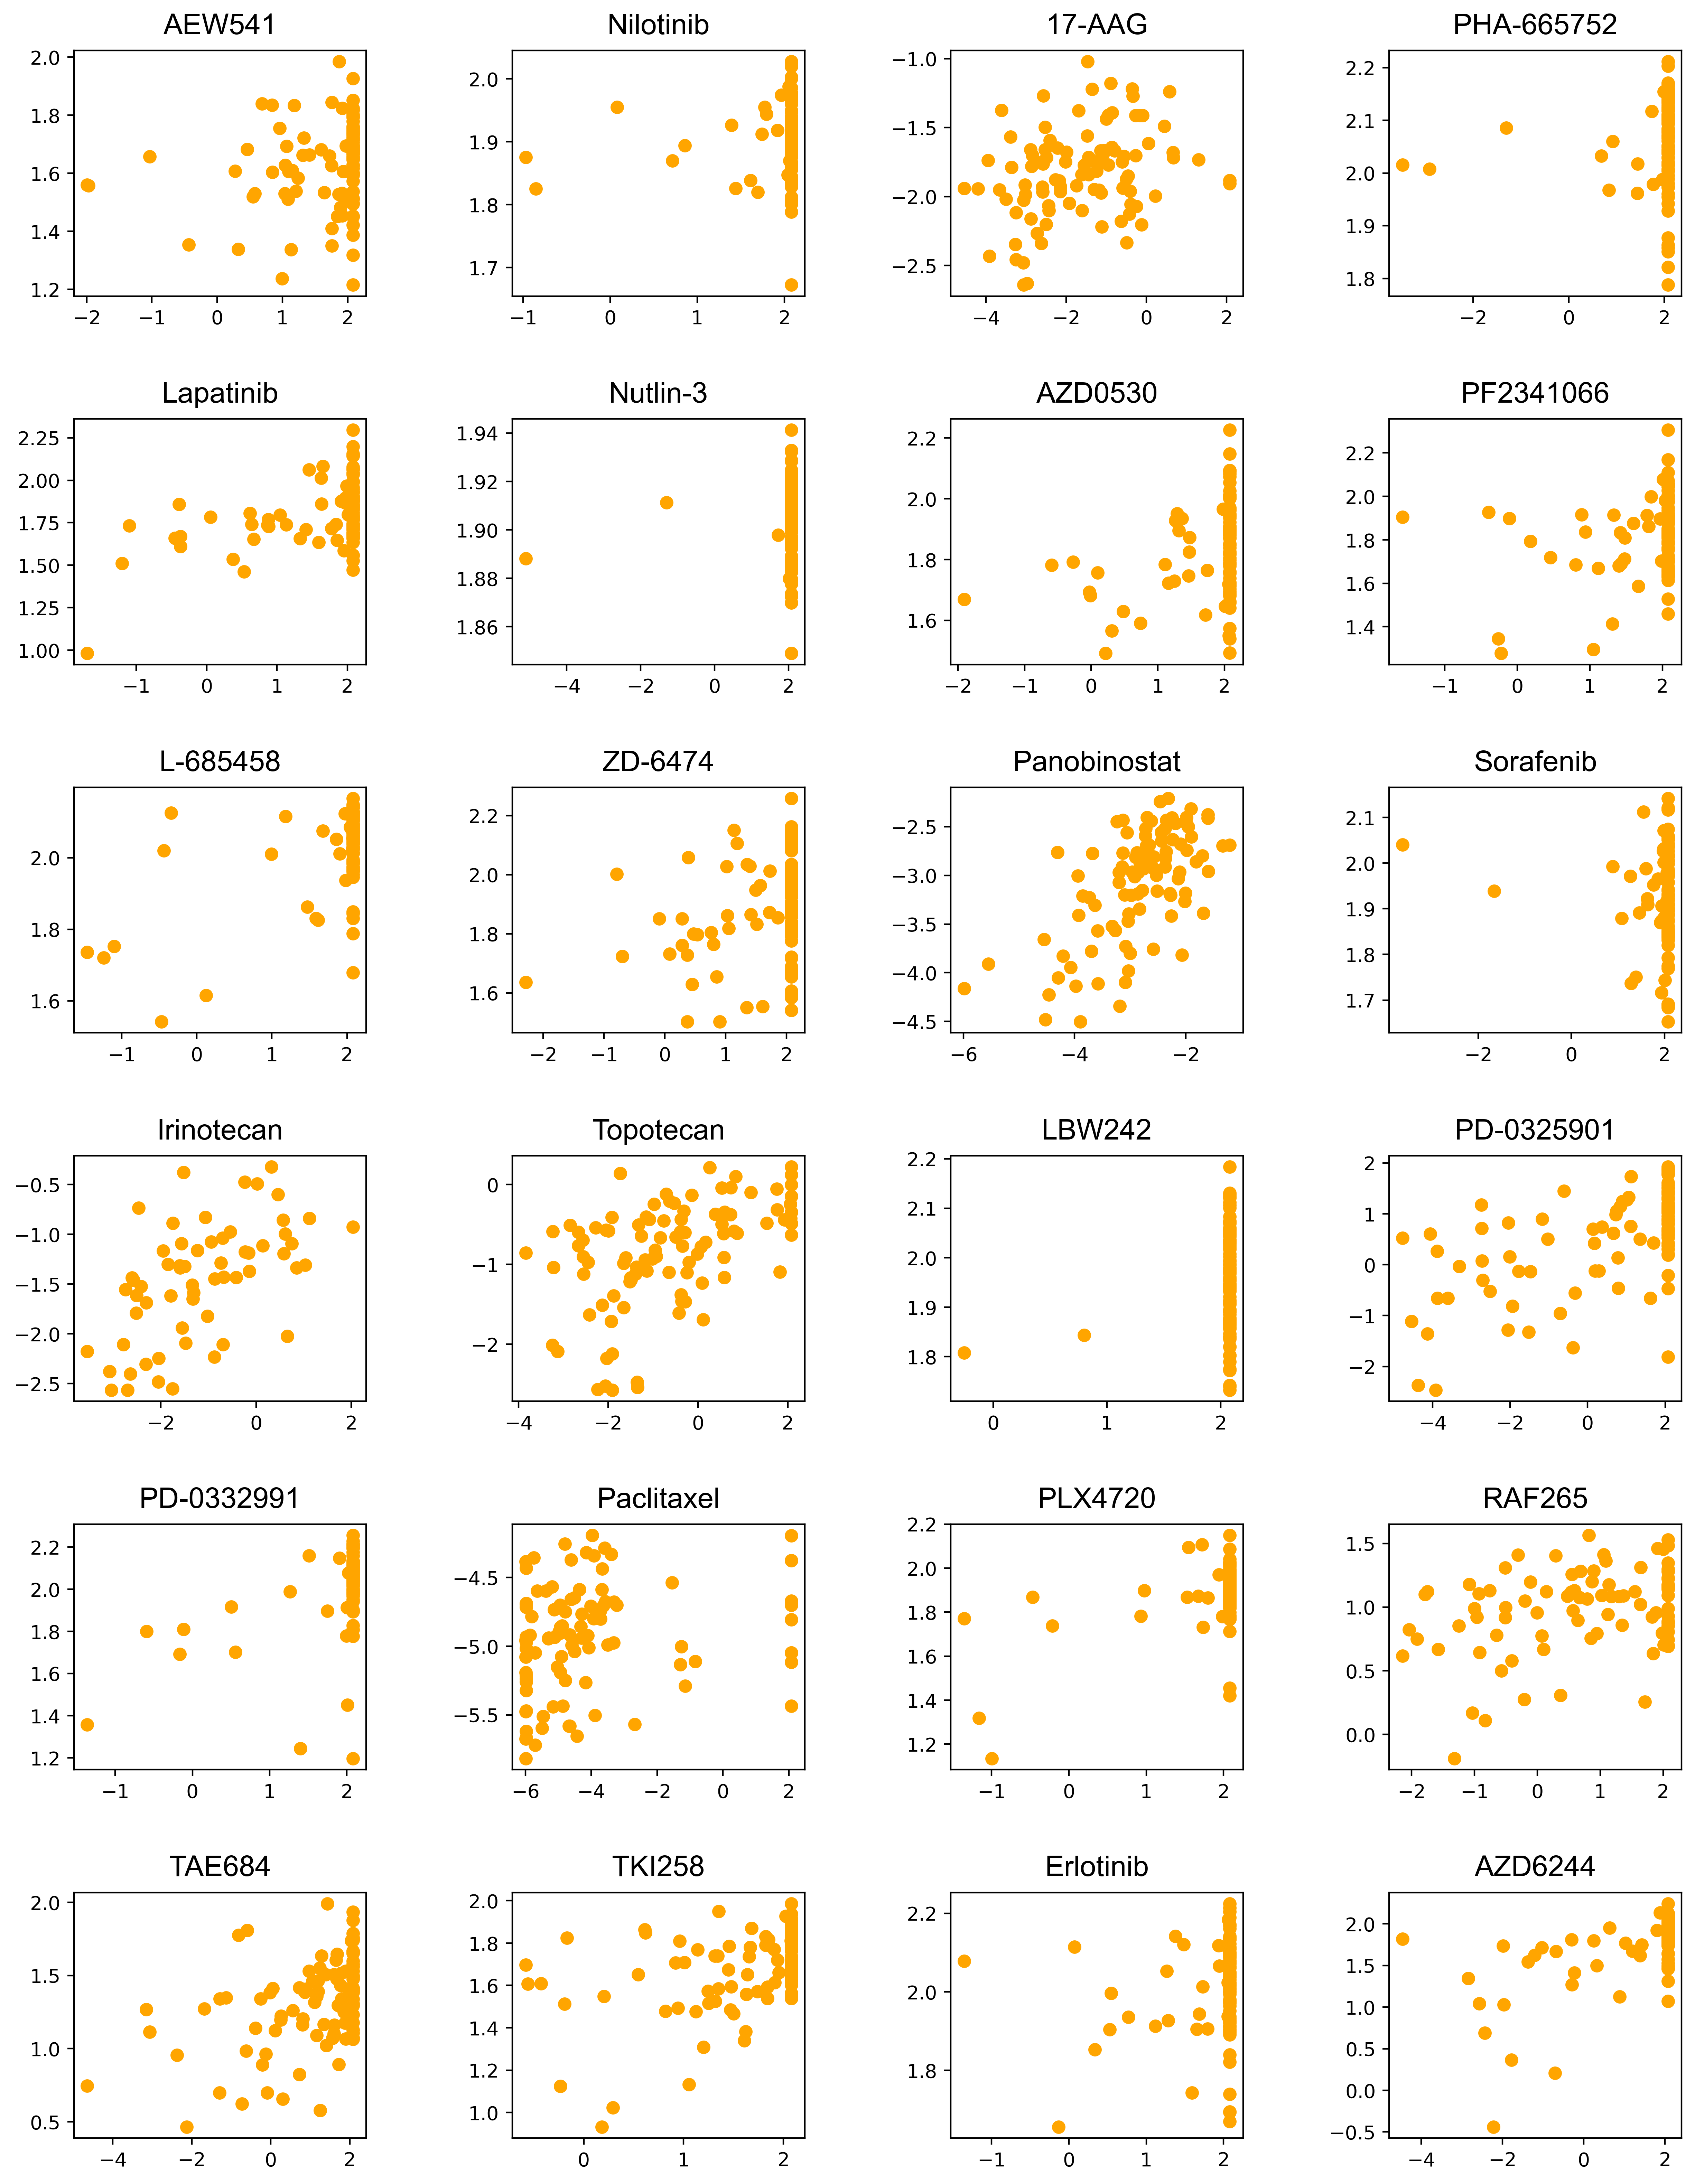

In [8]:
from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "//EC11K_%s.npz" % dname)
    ss0 = np.load(datasetdir + '//EC11K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # z-normalization
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]
    
    from sklearn import preprocessing
    import pickle
    scaler = preprocessing.StandardScaler()
    train_X = scaler.fit_transform(train_X)
    pickle.dump(scaler, open(datasetdir + "//standardization_models//znorm_scaler_%s.pkl" % dname, 'wb'))
    test_X = scaler.transform(test_X)
    
    # data reshape for CNN
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
    
    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model architecture
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # In[10]:
    with tf.device('/GPU:0'):
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(inputs)
        maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
        conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
        maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
        flatten_cell_line = Flatten()(maxpool_cell_line_2)
        dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
        dropout_cell_line = Dropout(0.1)(dense_cell_line)

        dense_1 = Dense(300, activation='tanh')(dropout_cell_line)
        dropout_1 = Dropout(0.1)(dense_1)
        reshape_1 = Reshape((300, 1))(dropout_1)
        conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
        maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
        conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
        maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
        conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
        maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
        dropout_2 = Dropout(0.1)(maxpool_3)
        flatten = Flatten()(dropout_2)
        dropout_3 = Dropout(0.2)(flatten)

        predictions = Dense(1, activation='linear')(dropout_3)



        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adam(learning_rate),
                      metrics=['mse','mae'])
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    with tf.device('/GPU:0'):
        model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                            validation_data=(test_X, test_y))

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    import json
    from keras.models import model_from_json, load_model

    # Option 1: Save Weights + Architecture
    model.save_weights(resultdir+ '//CNN//EC11K_znorm_CNN_%s.h5' % dname)
    with open(resultdir + '//CNN//EC11K_znorm_CNN_%s.json' % dname, 'w') as f:
        f.write(model.to_json())
    
    
    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '//CNN//predicted_table//EC11K_CNN_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
figdir = "D://indivdual_models//Result//Figure"
plt.savefig(figdir +'//EC11K_single_drug_CNN_plot.png', dpi=400)

In [9]:
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Finished time: " + day)

Finished time: 20221007


In [10]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [11]:
result

,Drug,RMSE,R2value
0,AEW541,0.784444,0.030651
1,Nilotinib,0.545718,0.010779
2,17-AAG,1.311840,0.065239
3,PHA-665752,0.855054,-0.038294
4,Lapatinib,0.775765,0.122427
5,Nutlin-3,0.797124,-0.003338
6,AZD0530,0.676167,0.088264
7,PF2341066,0.640248,0.066748
8,L-685458,0.715102,0.085935
9,ZD-6474,0.810705,-0.027270


In [12]:
result.to_csv(resultdir +'//EC11K_CNN_24drugs_metrics.csv', index=False)